# Import Required Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import PercentFormatter
import os
import seaborn as sns
import plotly.express as pex

# About Dataset

**Columns**

* Age
* Sex
* Blood Pressure Levels (BP)
* Cholesterol Levels
* Sodium to Potassium Ratio

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [ ]:
! kaggle datasets download -d prathamtripathi/drug-classification/code

  0% 0.00/1.68k [00:00<?, ?B/s]
100% 1.68k/1.68k [00:00<00:00, 1.25MB/s]


In [ ]:
!unzip \*.zip && rm *.zip

Archive:  drug-classification.zip
  inflating: drug200.csv             


# Let's get some insight about data 😉

In [ ]:
df = pd.read_csv('drug200.csv')

In [ ]:
df.shape

(200, 6)

In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

Hopefuly, there is no null values !

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


## Data Visualizatiin

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


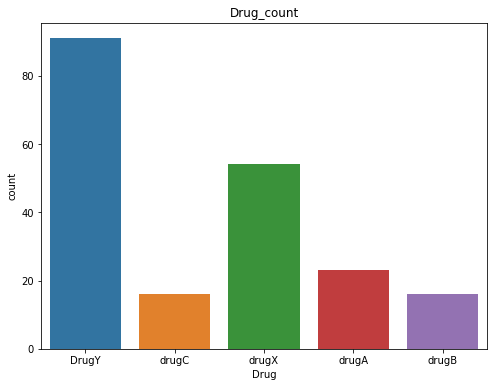

In [ ]:
plt.figure(figsize=(8, 6))

sns.countplot(df.Drug)
plt.title("Drug_count")
plt.show()

We have kind of imbalanced data. Now, we keep going with this dataset and if we don't get desired result, we will think about this abnormality.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


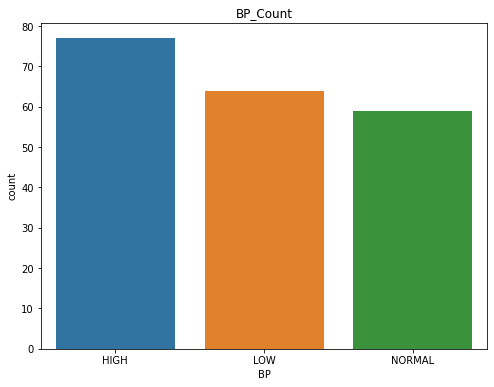

In [ ]:
plt.figure(figsize=(8, 6))

sns.countplot(df.BP)
plt.title("BP_Count")
plt.show()

We can see a little difference between number of people with **HIGH**, **LOW** and **NORMAL** blood pressure.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


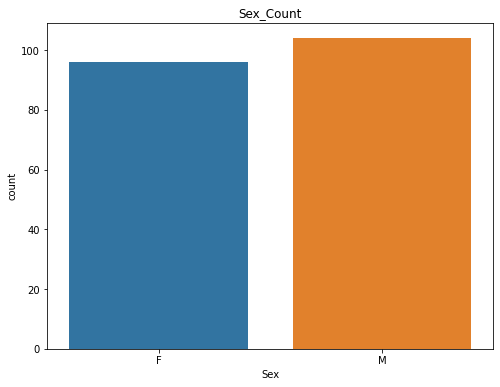

In [ ]:
plt.figure(figsize=(8, 6))

sns.countplot(df.Sex)
plt.title('Sex_Count')
plt.show()

There is no significant defference between **Male** and Female

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


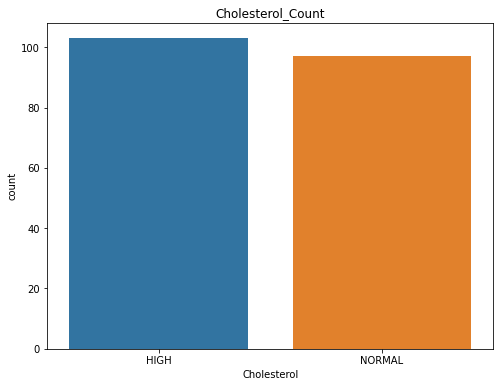

In [ ]:
plt.figure(figsize=(8, 6))

sns.countplot(df.Cholesterol)
plt.title("Cholesterol_Count")
plt.show()

Also, number of people with **HIGH** and NORMAL cholestrol level are almost the same, as like the attribute of gender

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


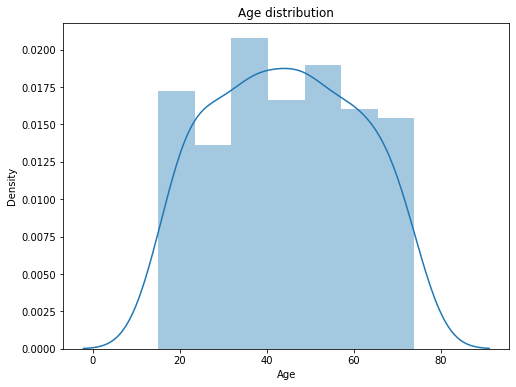

In [ ]:
plt.figure(figsize=(8, 6))

sns.distplot(df.Age)
plt.title('Age distribution')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


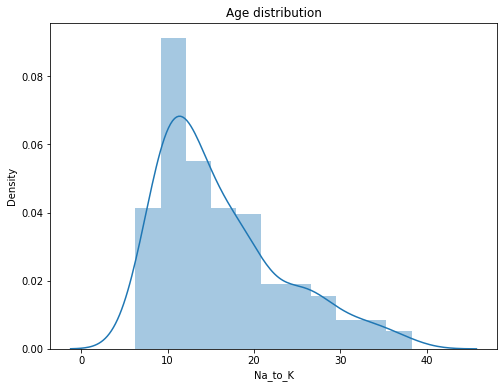

In [ ]:
plt.figure(figsize=(8, 6))

sns.distplot(df.Na_to_K)
plt.title('Age distribution')
plt.show()

We can see a little skewness to the left if Sodium to Potassium ratio

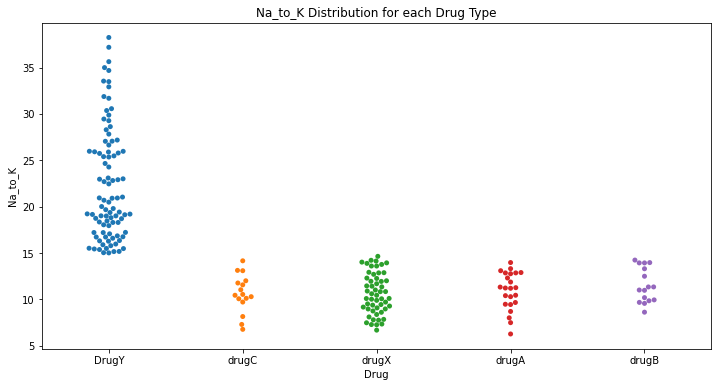

In [ ]:
plt.figure(figsize=(12, 6))

sns.swarmplot(x='Drug', y='Na_to_K', data=df)
plt.title("Na_to_K Distribution for each Drug Type")
plt.show()

People that uses **Drug Y**, have greater Sodium to Potassium ratio

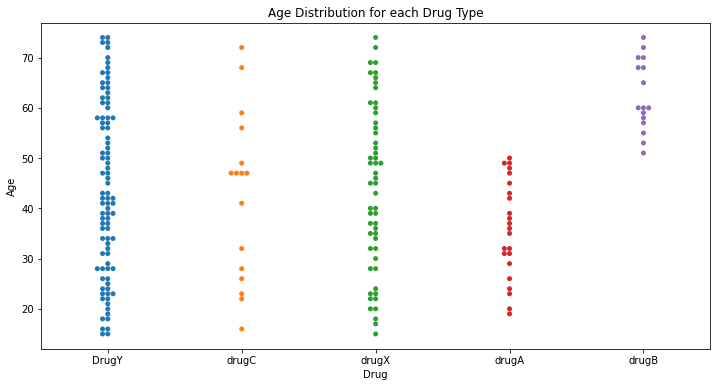

In [ ]:
plt.figure(figsize=(12, 6))

sns.swarmplot(x='Drug', y='Age', data=df)
plt.title("Age Distribution for each Drug Type")
plt.show()

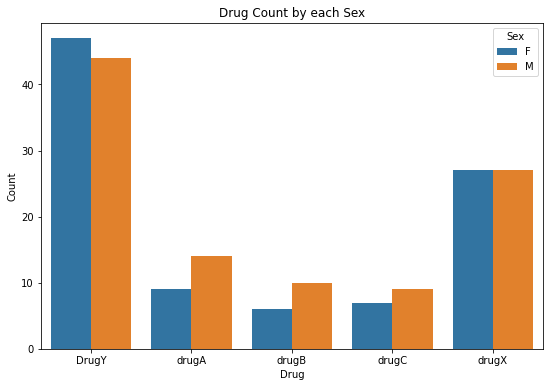

In [ ]:
plt.figure(figsize=(9, 6))

drug_sex = df.groupby(['Drug', 'Sex']).size().reset_index(name='Count')

sns.barplot(x='Drug', y='Count', hue='Sex', data=drug_sex)
plt.title("Drug Count by each Sex")
plt.show()

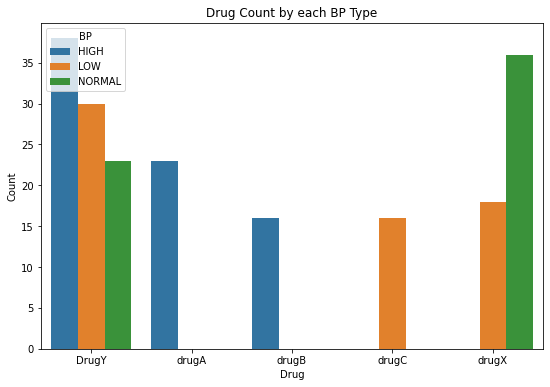

In [ ]:
plt.figure(figsize=(9, 6))

drug_sex = df.groupby(['Drug', 'BP']).size().reset_index(name='Count')

sns.barplot(x='Drug', y='Count', hue='BP', data=drug_sex)
plt.title("Drug Count by each BP Type")
plt.show()

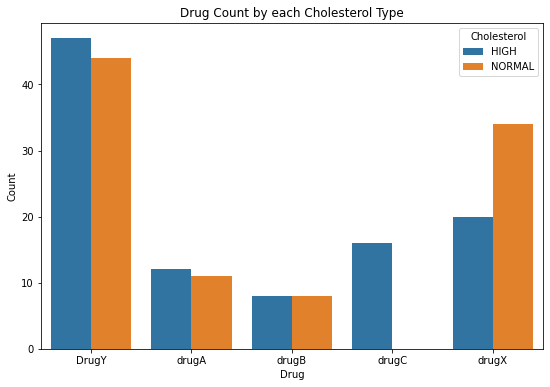

In [ ]:
plt.figure(figsize=(9, 6))

drug_sex = df.groupby(['Drug', 'Cholesterol']).size().reset_index(name='Count')

sns.barplot(x='Drug', y='Count', hue='Cholesterol', data=drug_sex)
plt.title("Drug Count by each Cholesterol Type")
plt.show()

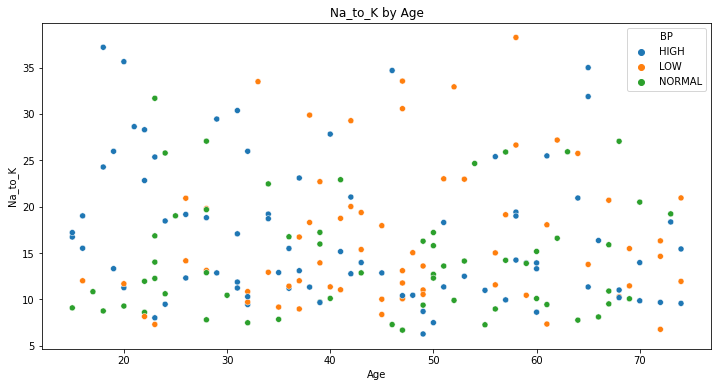

In [ ]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x='Age', y='Na_to_K', hue='BP', data=df)
plt.title('Na_to_K by Age')
plt.show()

## Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report as cr

Here we want to encode the categorical columns

In [ ]:
le = LabelEncoder()

for i in (['BP', 'Cholesterol', 'Sex', 'Drug']):
  df[i] = le.fit_transform(df[i])

Split the target column

In [ ]:
y = df.pop('Drug')

In [ ]:
df

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


## Scaling and Normalization of dataset

In [ ]:
scaler = StandardScaler()

normalized_df = scaler.fit_transform(df)

## Train Test Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(normalized_df, y, test_size=0.2)

# Start to Classify Our Data Points

## SVM

In [ ]:
from sklearn.svm import SVC

SVC_model = SVC(C=2, kernel='linear', decision_function_shape='ovr', max_iter=1000)
SVC_model.fit(x_train, y_train)
SVC_predicted = SVC_model.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [ ]:
print(cr(SVC_predicted, y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       1.00      1.00      1.00         4
           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00        12

    accuracy                           0.97        40
   macro avg       0.80      0.79      0.80        40
weighted avg       1.00      0.97      0.99        40



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


There is nothing to say 😃

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

LR_model_ovr = LogisticRegression(multi_class='ovr')
LR_model_ovr.fit(x_train, y_train)
LR_ovr_predicted = LR_model_ovr.predict(x_test)

In [ ]:
print(cr(LR_ovr_predicted, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00        12

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



 we get smaller scores with **Logistic Regression** rather than SVM

### Multinomial Logistic Regression

In [ ]:
LR_model_multinomial = LogisticRegression(multi_class='multinomial')
LR_model_multinomial.fit(x_train, y_train)
LR_multinomial_predicted = LR_model_multinomial.predict(x_test)

In [ ]:
print(cr(LR_multinomial_predicted, y_test))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        22
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         3
           4       0.83      1.00      0.91        10

    accuracy                           0.95        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.96      0.95      0.95        40



It's significantly better than simple Logistic Regression

In [ ]:
from sklearn.metrics import log_loss

pred_prob = LR_model_multinomial.predict_proba(x_test)
loss = log_loss(y_test, pred_prob)
print('The log_loss of multinomial logistic regression is: {}'.format(loss))

The log_loss of multinomial logistic regression is: 0.21873330337210883


## K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

n = range(2, 50)

scores = []

for i in n:

  model = KNeighborsClassifier(n_neighbors=i, weights='distance')
  model.fit(x_train, y_train)
  predict = model.predict(x_test)

  scores.append(f1_score(y_test, predict, average='macro'))

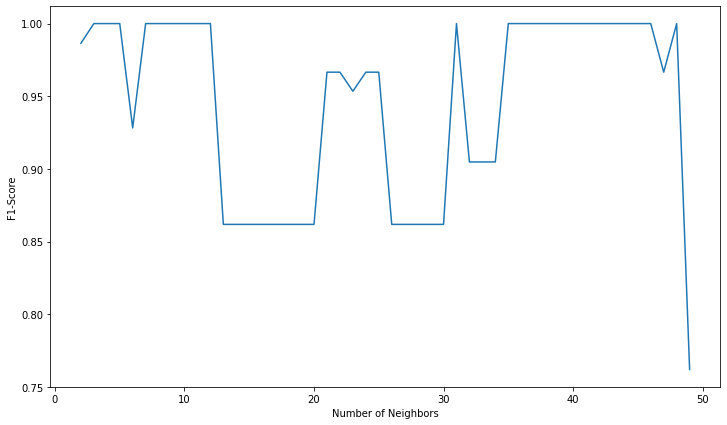

In [ ]:
plt.figure(figsize=(12, 7))
plt.plot(n, scores)
plt.xlabel('Number of Neighbors')
plt.ylabel('F1-Score')
plt.show()

**So the F1-Score will be maximum when number of neighbors set to 8**

In [ ]:
KNN_model=KNeighborsClassifier(n_neighbors=8, weights='distance')
KNN_model.fit(x_train, y_train)
KNN_predicted=KNN_model.predict(x_test)

In [ ]:
print(cr(KNN_predicted, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00        12

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



## Decesion Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

TREE_model = DecisionTreeClassifier(criterion='gini',max_depth=10)
TREE_model.fit(x_train, y_train)
TREE_predicted = TREE_model.predict(x_test)

In [ ]:
print(cr(TREE_predicted, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00        12

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



## XGBoost

In [ ]:
from xgboost import XGBClassifier

XGB_model = XGBClassifier(n_estimators=50)
XGB_model.fit(x_train, y_train,eval_metric=f1_score)
XGB_predicted = XGB_model.predict(x_test)

In [ ]:
print(cr(XGB_predicted, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.75      1.00      0.86         3
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00        12

    accuracy                           0.97        40
   macro avg       0.95      0.90      0.90        40
weighted avg       0.98      0.97      0.97        40



## Light GBM

In [ ]:
import lightgbm as lgb

LGB_model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=10)
LGB_model.fit(x_train,y_train)
LGB_predicted = LGB_model.predict(x_test)

In [ ]:
print(cr(LGB_predicted, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00        12

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 12.5 MB/s eta 0:00:00


## CatBoost

In [ ]:
from catboost import CatBoostClassifier
CBC_model = CatBoostClassifier(learning_rate=.05, iterations=200, verbose=False)
CBC_model.fit(x_train, y_train)
CBC_predicted = CBC_model.predict(x_test)

In [ ]:
print(cr(CBC_predicted, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00        12

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



# Grid Search For Tunning CatBoost Hyper Parameters:

In [ ]:
iterations = [100, 200, 300, 400]
learning_rate = [0.001, 0.005, 0.01, 0.05]

hyperparameters = {"iterations":iterations, "learning_rate":learning_rate}#, "depth":depth, "max_leaves":max_leaves}

Above, we wanted to consider all the CatBosst's parameters. But, always we got **"Your RAM is full"** Error, so we decide to participate just two of more important parameter of CatBoost algorithm, named **"iteration"** and **"learning rate"**.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
gsc = GridSearchCV(CBC_model, hyperparameters, cv=5, verbose=1)
best_model = gsc.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [ ]:
print("Best Number of Iteration is : ", best_model.best_estimator_.get_params()['iterations'])
print("Best Learning Rate is : ", best_model.best_estimator_.get_params()['learning_rate'])

Best Number of Iteration is :  400
Best Learning Rate is :  0.05
